In [1]:
import pandas as pd
import numpy as np


In [5]:
bankchurn = pd.read_csv(r"D:\analytics resume\bank customer segmentation guided project maven\Bank_Churn.csv")

In [7]:
bankchurn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
bankchurnsubset = bankchurn[["CreditScore", "Geography",	"Gender",	"Age",	"Tenure",	"Balance",	"NumOfProducts",	"HasCrCard",	"IsActiveMember",	"EstimatedSalary"]]

In [11]:
bankchurnsubset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
dataclean=bankchurnsubset.copy()
dataclean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [17]:
dataclean["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [19]:
dataclean["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [25]:
#assign all males 0 and females 1
dataclean.Gender=np.where(dataclean.Gender=="Male",0,1)
dataclean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10


In [35]:
dataclean=pd.get_dummies(dataclean, columns=["Geography"],dtype="int",prefix="",prefix_sep="")

In [37]:
dataclean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [39]:
dataclean.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
count,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.0,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700
std,96.653299,0.0,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698
min,350.000000,1.0,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,1.0,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.0,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000
75%,718.000000,1.0,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000
max,850.000000,1.0,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


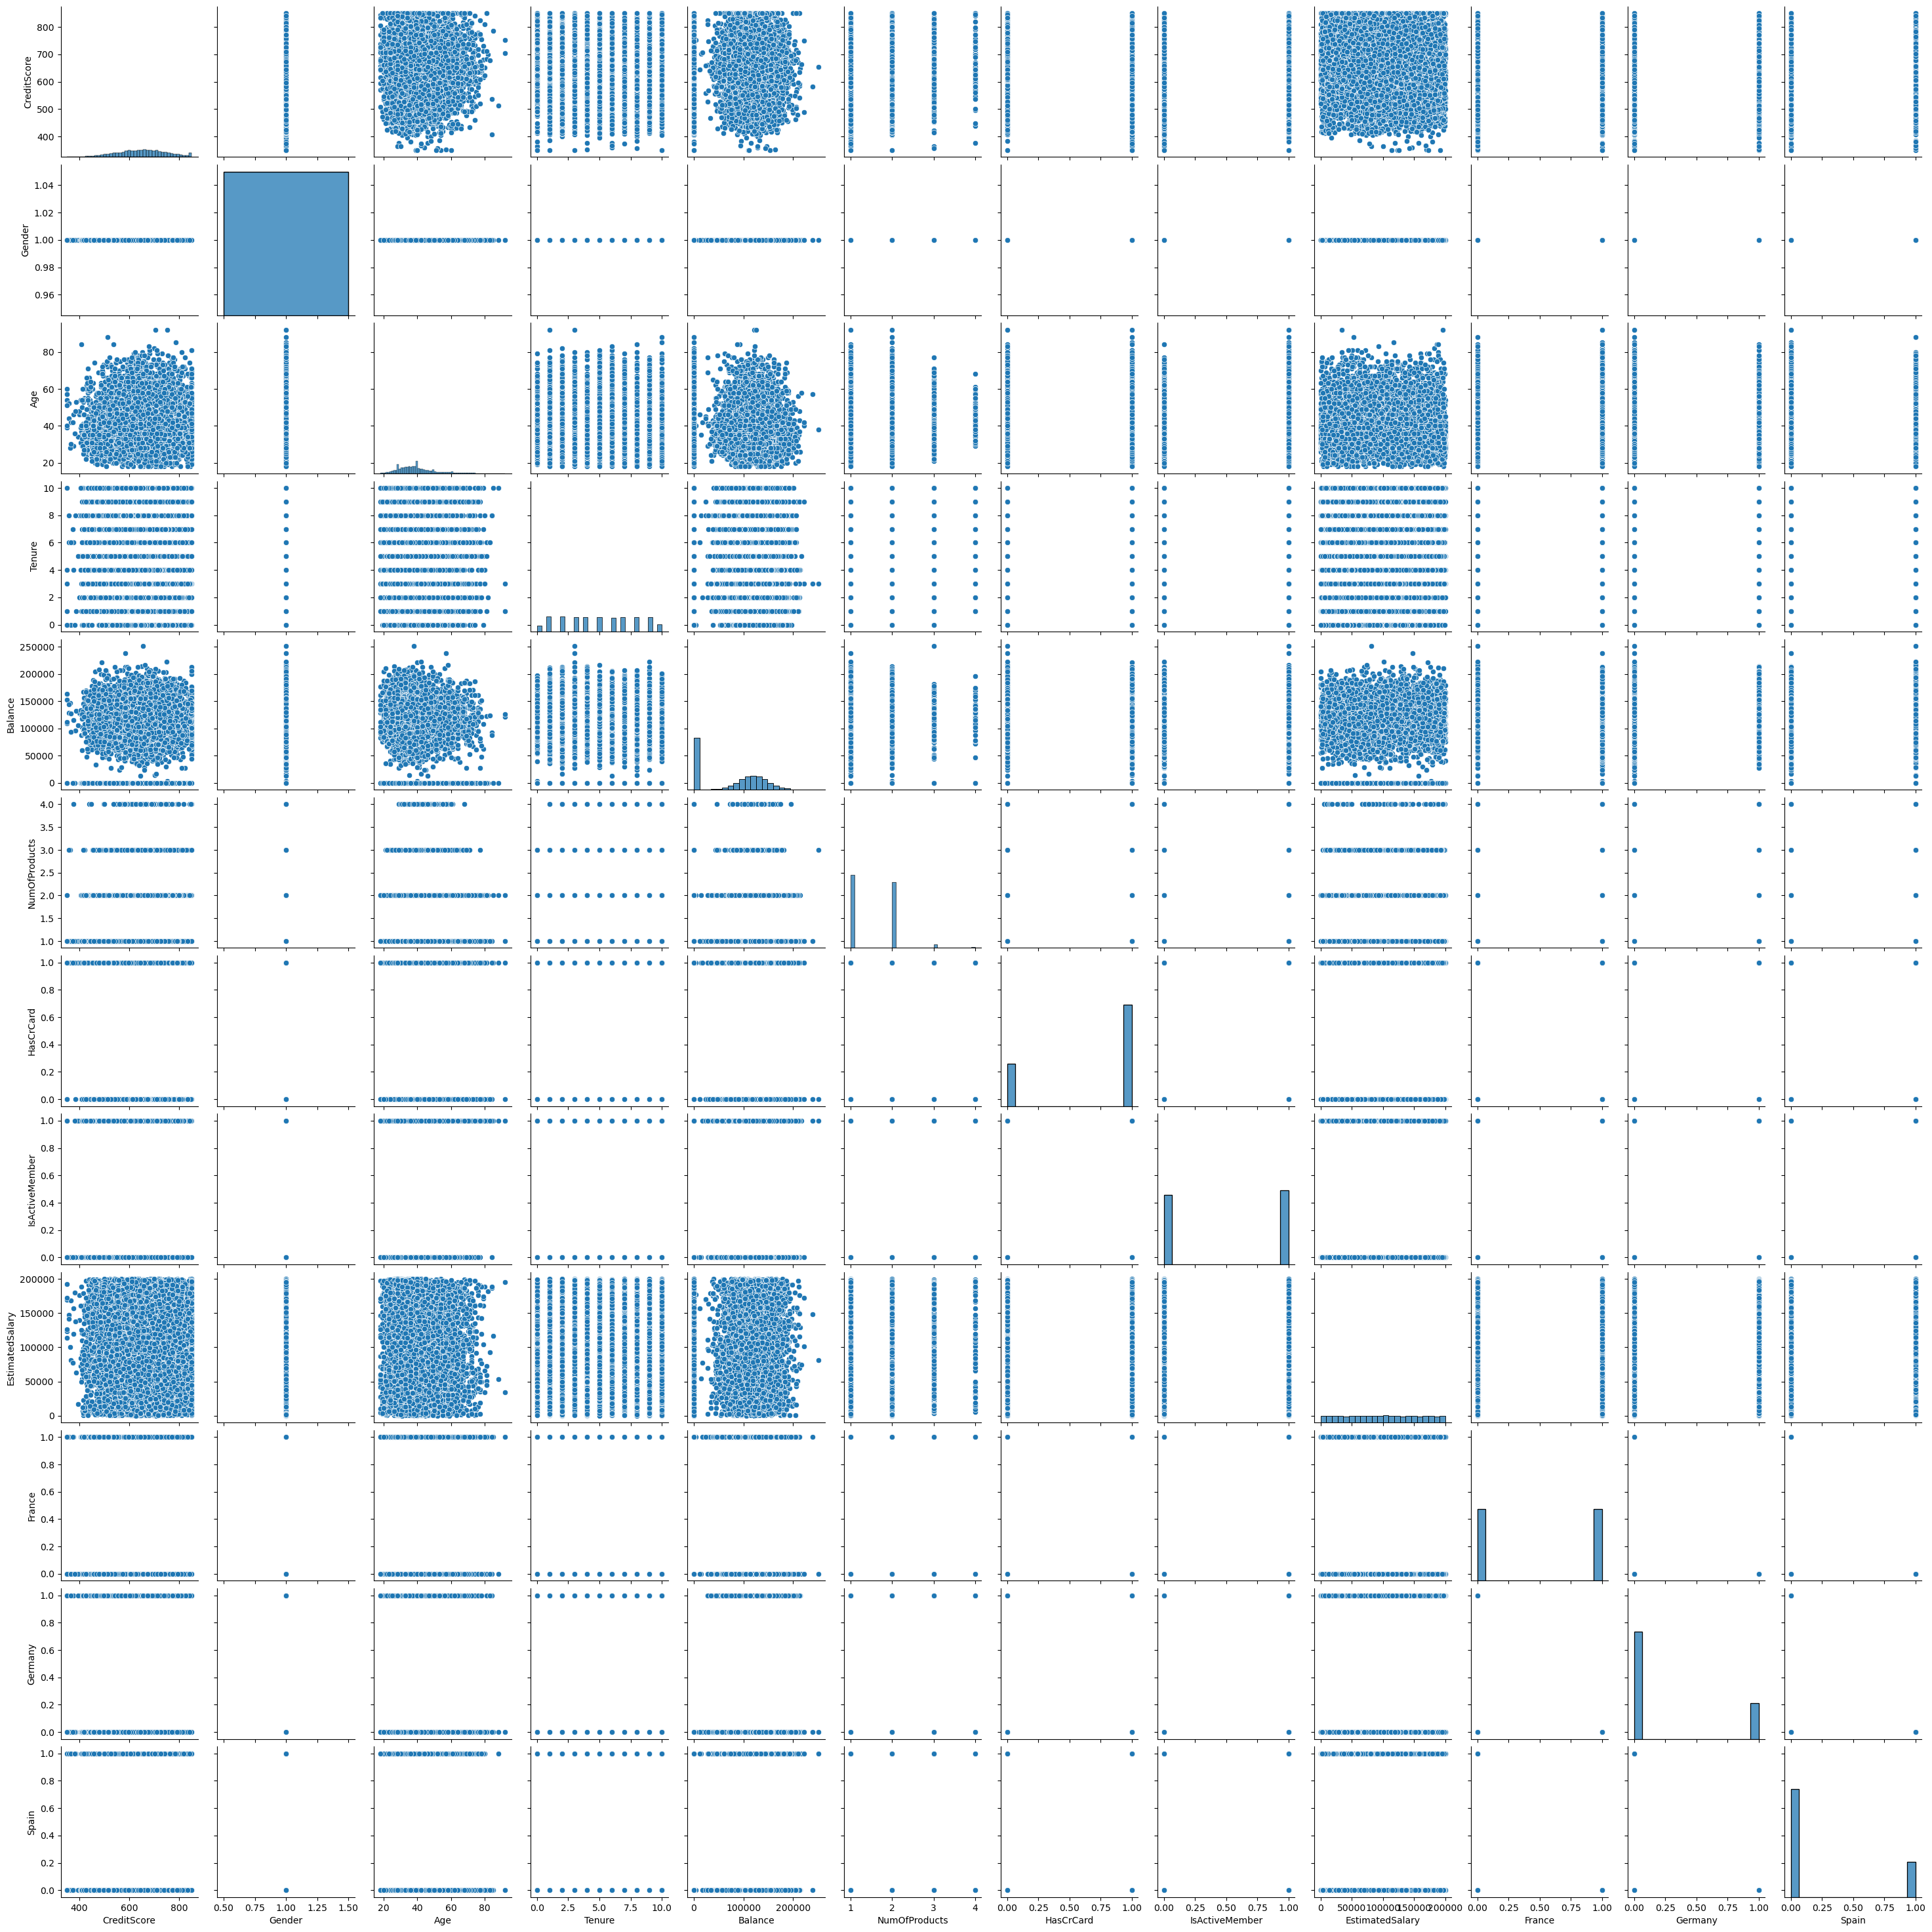

In [44]:
import seaborn as sns
sns.pairplot(dataclean)

In [46]:
dataclean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [60]:
np.where(dataclean.Tenure==0, dataclean["NumOfProducts"], dataclean.NumOfProducts/dataclean.Tenure)
dataclean.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,650.528800,1.0,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,inf
std,96.653299,0.0,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,NaN
min,350.000000,1.0,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,1.000000e-01
25%,584.000000,1.0,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,2.000000e-01
50%,652.000000,1.0,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,3.333333e-01
75%,718.000000,1.0,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,6.666667e-01
max,850.000000,1.0,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,inf


In [50]:
dataclean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500


In [52]:
dataclean.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,650.528800,1.0,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,inf
std,96.653299,0.0,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,NaN
min,350.000000,1.0,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,1.000000e-01
25%,584.000000,1.0,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,2.000000e-01
50%,652.000000,1.0,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,3.333333e-01
75%,718.000000,1.0,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,6.666667e-01
max,850.000000,1.0,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,inf


In [ ]:
#CLUSTER THE CUSTOMERS

In [62]:
dataclean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500


In [99]:
from sklearn.preprocessing import StandardScaler

# Replace inf/-inf with NaN
dataclean.replace([np.inf, -np.inf], np.nan, inplace=True)

# Option 1: Drop rows with NaN values
dataclean.dropna(inplace=True)

# Option 2: Fill NaN values with the mean of each column
# dataclean.fillna(dataclean.mean(), inplace=True)

# Now apply StandardScaler
scaler = StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(dataclean),columns=dataclean.columns)
df_scaled.head()



,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,-0.325496,0.0,0.294369,-1.171574,-1.223056,-0.914862,0.642303,0.971512,0.023596,0.996772,-0.578515,-0.573697,0.067985
1,-0.439294,0.0,0.199091,-1.534432,0.119649,-0.914862,-1.556897,0.971512,0.218227,-1.003239,-0.578515,1.743081,1.139013
2,-1.535884,0.0,0.294369,1.005569,1.334906,2.511895,0.642303,-1.029323,0.242378,0.996772,-0.578515,-0.573697,-0.199773
3,0.502119,0.0,0.008537,-1.534432,-1.223056,0.798516,-1.556897,-1.029323,-0.107198,0.996772,-0.578515,-0.573697,3.281070
4,2.064243,0.0,0.389646,-1.171574,0.787782,-0.914862,0.642303,0.971512,-0.363535,-1.003239,-0.578515,1.743081,0.067985


In [101]:
df_scaled.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,9.587000e+03,9587.0,9.587000e+03,9.587000e+03,9.587000e+03,9.587000e+03,9.587000e+03,9.587000e+03,9.587000e+03,9.587000e+03,9.587000e+03,9.587000e+03,9.587000e+03
mean,2.868260e-16,0.0,1.447100e-16,-6.373910e-17,3.779877e-17,-4.928663e-17,8.893828e-18,1.174726e-16,-8.449137e-17,-4.817490e-17,5.169537e-17,-2.668148e-17,1.895497e-16
std,1.000052e+00,0.0,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-3.108353e+00,0.0,-1.992286e+00,-1.534432e+00,-1.223056e+00,-9.148623e-01,-1.556897e+00,-1.029323e+00,-1.738414e+00,-1.003239e+00,-5.785146e-01,-5.736968e-01,-7.888382e-01
25%,-6.979233e-01,0.0,-6.584039e-01,-8.087172e-01,-1.223056e+00,-9.148623e-01,-1.556897e+00,-1.029323e+00,-8.523084e-01,-1.003239e+00,-5.785146e-01,-5.736968e-01,-5.746325e-01
50%,1.589493e-02,0.0,-1.820176e-01,-8.300261e-02,3.313750e-01,-9.148623e-01,6.423032e-01,9.715123e-01,-1.178746e-03,9.967717e-01,-5.785146e-01,-5.736968e-01,-3.910276e-01
75%,6.986776e-01,0.0,4.849232e-01,1.005569e+00,8.206992e-01,7.985162e-01,6.423032e-01,9.715123e-01,8.553721e-01,9.967717e-01,1.728565e+00,-5.736968e-01,6.798451e-02
max,2.064243e+00,0.0,5.058232e+00,1.731284e+00,2.796640e+00,4.225273e+00,6.423032e-01,9.715123e-01,1.738769e+00,9.967717e-01,1.728565e+00,1.743081e+00,7.565183e+00


# put kmeans models on stdd data with 2-15 clusters to create an inertia plot

In [105]:
# import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create an empty list to hold many inertia and silhouette values
inertia_values = []
silhouette_scores = []

# create 2 – 15 clusters, and add the inertia scores and silhouette scores to the lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean', sample_size=None))


Text(0, 0.5, 'Inertia')

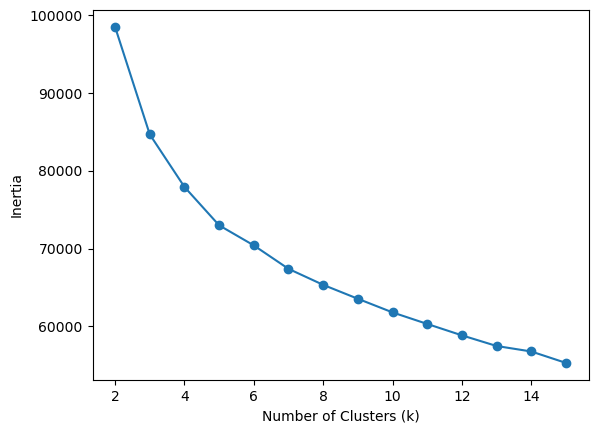

In [107]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")


In [ ]:
#identify elbow of inertia plot and fit a kmenas model using value of k

In [113]:
kmeans5=KMeans(n_clusters=5,n_init=10,random_state=42)
kmeans5.fit(df_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [117]:
from collections import Counter
Counter(kmeans5.labels_)

Counter({4: 2317, 2: 2276, 3: 2265, 1: 2219, 0: 510})

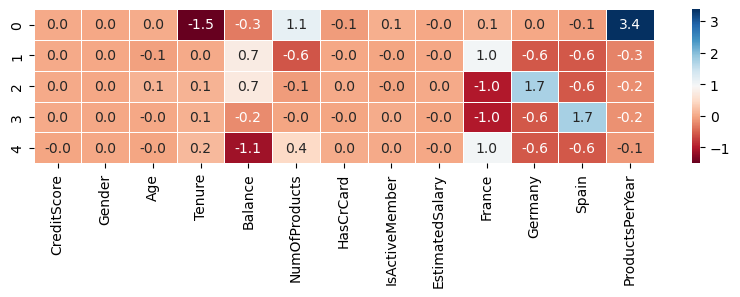

In [119]:
# create a heat map of the cluster centers
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=df_scaled.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers5, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);


In [ ]:
0: many products short time
1: french customers with few products, high balance
3: german with high bal
4: french customers with more products, low bal
5: spanish

In [121]:
#objective 3

In [131]:
#1
datageo=bankchurnsubset.copy() 
datageo

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [133]:
datageo.Gender=np.where(datageo.Gender=="Female",1,0)
datageo

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42,2,0.00,1,1,1,101348.88
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58
2,502,France,1,42,8,159660.80,3,1,0,113931.57
3,699,France,1,39,1,0.00,2,0,0,93826.63
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64
9996,516,France,0,35,10,57369.61,1,1,1,101699.77
9997,709,France,1,36,7,0.00,1,0,1,42085.58
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52


In [135]:
datageo.groupby("Geography").mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Geography,,,,,,,,,
France,649.668329,0.450937,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814
Germany,651.453567,0.475488,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102
Spain,651.333872,0.439645,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281


In [137]:
datageo[datageo.Geography == "France"].Balance.round(-5).value_counts()

Balance
0.0         2459
100000.0    2123
200000.0     432
Name: count, dtype: int64

In [139]:
datageo[datageo.Geography == "Germany"].Balance.round(-5).value_counts()

Balance
100000.0    2176
200000.0     314
0.0           19
Name: count, dtype: int64

In [141]:
datageo[datageo.Geography == "Spain"].Balance.round(-5).value_counts()

Balance
0.0         1214
100000.0    1040
200000.0     222
300000.0       1
Name: count, dtype: int64

In [149]:
#removing countries
df_scaled_nogeo=df_scaled.drop(columns={"France","Germany","Spain"})
df_scaled_nogeo.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ProductsPerYear
0,-0.325496,0.0,0.294369,-1.171574,-1.223056,-0.914862,0.642303,0.971512,0.023596,0.067985
1,-0.439294,0.0,0.199091,-1.534432,0.119649,-0.914862,-1.556897,0.971512,0.218227,1.139013
2,-1.535884,0.0,0.294369,1.005569,1.334906,2.511895,0.642303,-1.029323,0.242378,-0.199773
3,0.502119,0.0,0.008537,-1.534432,-1.223056,0.798516,-1.556897,-1.029323,-0.107198,3.281070
4,2.064243,0.0,0.389646,-1.171574,0.787782,-0.914862,0.642303,0.971512,-0.363535,0.067985


In [155]:
# import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create an empty list to hold many inertia and silhouette values
inertia_values = []
silhouette_scores = []

# create 2 – 15 clusters, and add the inertia scores and silhouette scores to the lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(df_scaled_nogeo)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled_nogeo, kmeans.labels_, metric='euclidean', sample_size=None))


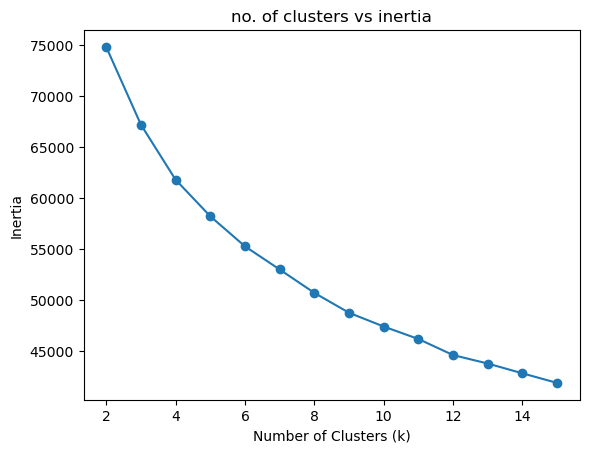

In [159]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("no. of clusters vs inertia");

In [ ]:
#identify elbow of inertia plot and fit a kmenas model using value of k

In [173]:
kmeans4=KMeans(n_clusters=4,n_init=10,random_state=42)
kmeans4.fit(df_scaled_nogeo)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [175]:
#3
Counter(kmeans4.labels_)

Counter({2: 3227, 3: 2318, 0: 2275, 1: 1767})

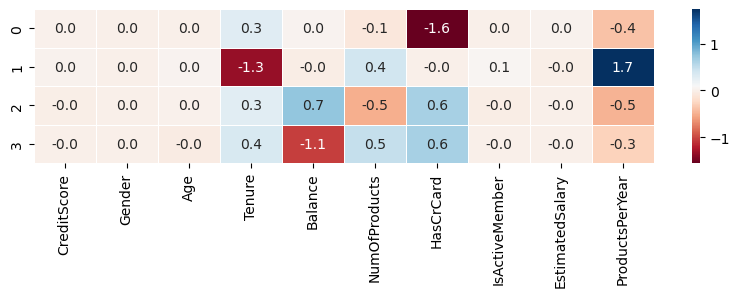

In [179]:
#5
# create a heat map of the cluster centers
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=df_scaled_nogeo.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);


In [181]:
*1: dont have credit card
*2: low tenure, high prod per yr
*3:high bal few products credit cards
*4: low bal more prod, have credit cards 

SyntaxError: invalid syntax (2454994884.py, line 1)

In [183]:
#explore clusters and make reccommendations
dataclean

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,0.500000
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,1.000000
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,0.375000
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,2.000000
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,0.400000
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,0.100000
9997,709,1,36,7,0.00,1,0,1,42085.58,1,0,0,0.142857
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0,0.666667


In [185]:
bankchurn.Exited.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [187]:
kmeans4.labels_

array([3, 1, 2, ..., 0, 1, 2])

In [197]:
datafinal=pd.concat([dataclean,bankchurn.Exited,pd.Series(kmeans4.labels_,name="Cluster")],axis=1)

In [199]:
datafinal

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited,Cluster
0,619.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.500,1,3.0
1,608.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,1.000,0,1.0
2,502.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.375,1,2.0
3,699.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,1.0,0.0,0.0,2.000,0,1.0
4,850.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.500,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
9843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [201]:
#2 view exit%
datafinal.groupby("Cluster").mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited
Cluster,,,,,,,,,,,,,,
0.0,647.847497,1.0,38.847037,5.233808,74723.537143,1.529169,0.718879,0.515388,101878.607965,0.493339,0.263666,0.242995,0.467652,0.222418
1.0,650.474276,1.0,39.189237,5.213483,76340.214861,1.531638,0.704317,0.522176,99244.821449,0.491425,0.251922,0.256653,0.453229,0.203169
2.0,652.168387,1.0,38.780968,5.220968,77099.587671,1.539677,0.705484,0.520968,99309.709677,0.508387,0.247742,0.243871,0.476253,0.198327
3.0,649.446953,1.0,38.997743,5.242438,76536.318804,1.540406,0.702483,0.494357,100103.767905,0.506095,0.239729,0.254176,0.468645,0.199741


In [203]:
#cluster 0 = highest churnrate
#cluster 2 = lowest churn rate

In [ ]:
#recommendations
0: create an entry level credit card
1: entice high balance customers to stay
2: reward them for their high tenure, french and spanish customers
3: encourage them to stay